In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ukrainian-market-mobile-phones-data/phones_data.csv


In [2]:
print(os.listdir())

['__notebook__.ipynb']


In [3]:
data = pd.read_csv('/kaggle/input/ukrainian-market-mobile-phones-data/phones_data.csv')

In [4]:
data.head(10)

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020
5,5,Honor,10 6/64GB Black,Android,71,10865.0,10631.0,11099.0,2,5.80,64.0,3400.0,6-2018
6,6,Honor,10 Lite 3/32GB Blue,Android,424,3999.0,NaN,NaN,2,6.21,32.0,3400.0,12-2018
7,7,Honor,10 Lite 4/64GB Black,Android,134,4973.0,4733.0,5295.0,6,6.21,64.0,3400.0,1-2019
8,8,Honor,10 lite 3/128GB Blue,Android,477,5100.0,4990.0,5222.0,3,6.21,128.0,3400.0,1-2021
9,9,Honor,10 lite 3/64GB Black,Android,215,4948.0,4646.0,5372.0,8,6.21,64.0,3400.0,12-2018


In [5]:
data.shape

(1224, 13)

# data cleaning and EDA

In [6]:
data.isna().sum()

Unnamed: 0          0
brand_name          0
model_name          0
os                197
popularity          0
best_price          0
lowest_price      260
highest_price     260
sellers_amount      0
screen_size         2
memory_size       112
battery_size       10
release_date        0
dtype: int64

<AxesSubplot:xlabel='os', ylabel='count'>

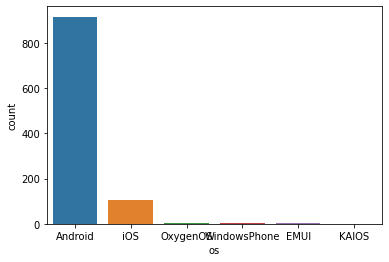

In [7]:
import seaborn as sns
sns.countplot(data = data, x='os')

In [8]:
data['os'].fillna('Android', inplace=True)


<AxesSubplot:xlabel='battery_size', ylabel='Count'>

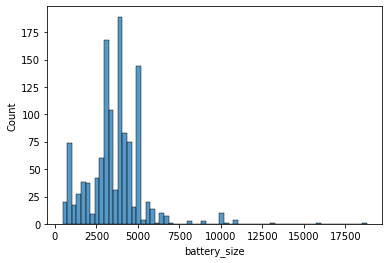

In [9]:
sns.histplot(data = data, x='battery_size')

<AxesSubplot:title={'center':'HIGHEST PRICE'}, xlabel='highest_price', ylabel='Count'>

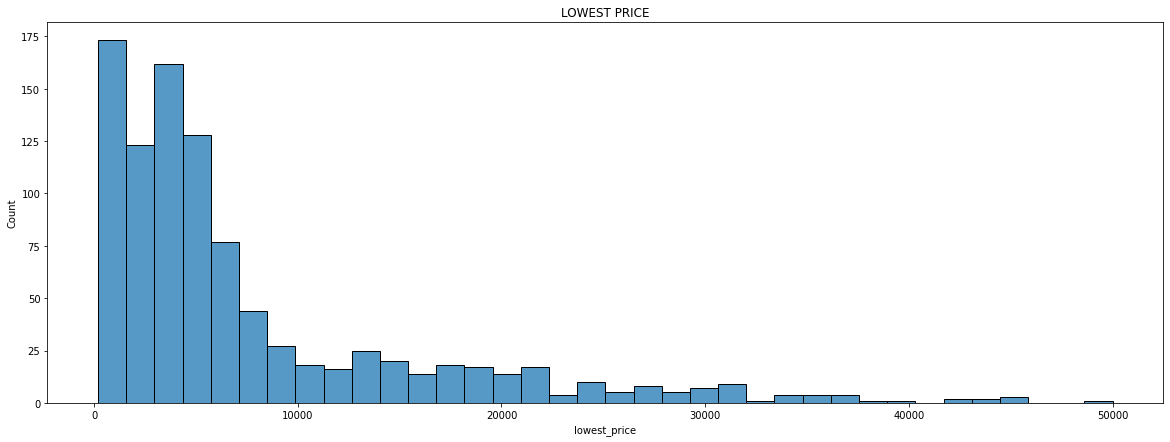

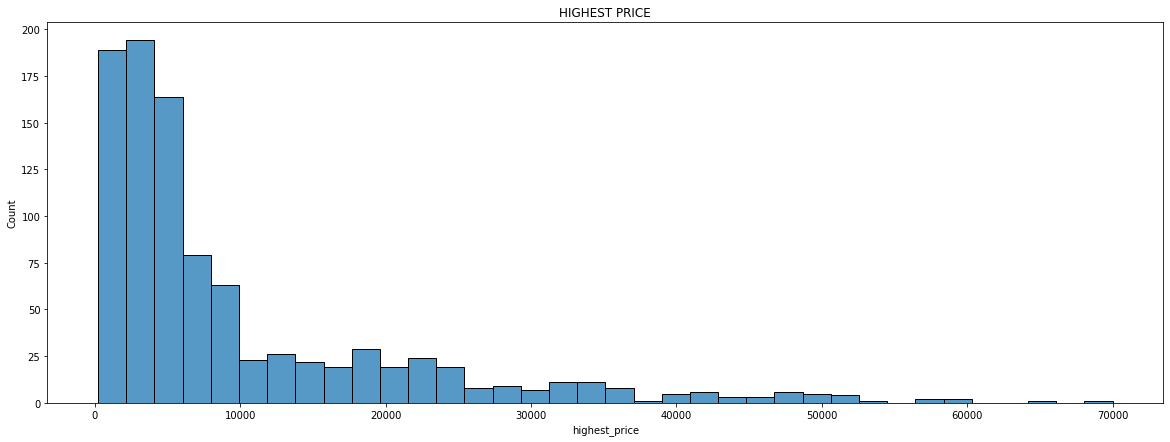

In [10]:

import matplotlib.pyplot as plt
plt.figure(figsize=(20,7))
plt.title('LOWEST PRICE')
sns.histplot(data = data, x = 'lowest_price')

plt.figure(figsize=(20,7))
plt.title('HIGHEST PRICE')
sns.histplot(data = data, x = 'highest_price')

In [11]:
data.screen_size.nunique()

82

<AxesSubplot:ylabel='Frequency'>

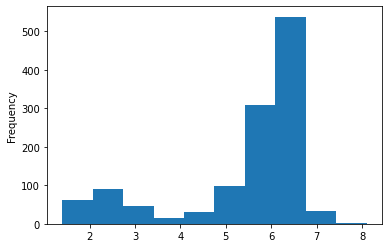

In [12]:
data.screen_size.plot(kind='hist')

*replace all numerical missing values with the median*

In [13]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(strategy='median')
data[['battery_size','lowest_price', 'highest_price','screen_size']] = imp_median.fit_transform(data[['battery_size','lowest_price', 'highest_price','screen_size']])

In [14]:
data.isna().sum()

Unnamed: 0          0
brand_name          0
model_name          0
os                  0
popularity          0
best_price          0
lowest_price        0
highest_price       0
sellers_amount      0
screen_size         0
memory_size       112
battery_size        0
release_date        0
dtype: int64

In [15]:
data.memory_size.nunique()

15

<AxesSubplot:xlabel='memory_size', ylabel='count'>

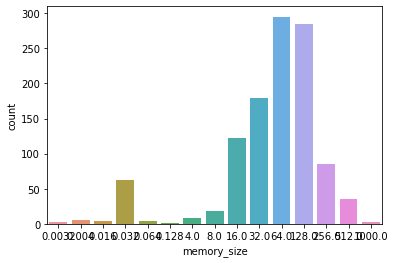

In [16]:
sns.countplot(data = data, x = 'memory_size')

In [17]:
data['memory_size'] = imp_median.fit_transform(data[['memory_size']])

# data preprocessing

In [18]:
from sklearn.preprocessing import StandardScaler
data.drop(columns=['Unnamed: 0'],inplace=True)


In [19]:
num_feats = data.select_dtypes(include='number').columns.values
cat_feats = data.select_dtypes(exclude='number').columns.values

print('CATEGORICAL FEATURES')
print(cat_feats)
print()
print('NUMERICAL FEATURES')
print(num_feats)

CATEGORICAL FEATURES
['brand_name' 'model_name' 'os' 'release_date']

NUMERICAL FEATURES
['popularity' 'best_price' 'lowest_price' 'highest_price' 'sellers_amount'
 'screen_size' 'memory_size' 'battery_size']


In [20]:
for col in cat_feats:
    print(f'Amount of Unique {col} is', data[col].nunique())

Amount of Unique brand_name is 64
Amount of Unique model_name is 1068
Amount of Unique os is 6
Amount of Unique release_date is 73


In [21]:
data[['Month','Year']] = data.release_date.str.split('-',expand=True)

In [22]:
# a little feature engineering
data['average_price'] = (data['lowest_price'] + data['highest_price']) /2


<AxesSubplot:xlabel='popularity', ylabel='sellers_amount'>

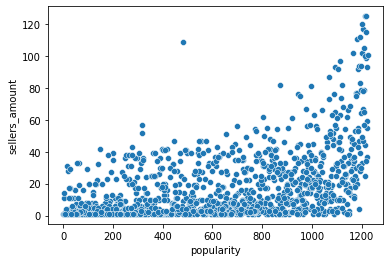

In [23]:
sns.scatterplot(data = data, x = 'popularity', y = 'sellers_amount')

In [24]:
data_corr = data.corr()
data_corr['average_price']

popularity        0.352679
best_price        0.953645
lowest_price      0.989788
highest_price     0.994394
sellers_amount    0.331100
screen_size       0.417487
memory_size       0.673452
battery_size      0.152774
average_price     1.000000
Name: average_price, dtype: float64

In [25]:
num_feats = num_feats.tolist()

In [26]:
num_feats.remove('best_price')

In [27]:
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
scaler = StandardScaler()
data[num_feats] = scaler.fit_transform(data[num_feats])

In [28]:
for col in cat_feats:
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.codes

In [29]:
data.head(10)

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date,Month,Year,average_price
0,2,0,0,-0.539143,1690.0,-0.716688,-0.683482,0.935301,-0.267976,-0.792354,-0.968734,12,10,2020,1674.00
1,2,1,0,-0.819328,1803.0,-0.699808,-0.618950,0.935301,-0.267976,-0.717603,-0.968734,72,9,2020,2074.00
2,2,1,0,-0.887252,1803.0,-0.699808,-0.618950,0.935301,-0.267976,-0.717603,-0.968734,72,9,2020,2074.00
3,2,1,0,-0.921214,1803.0,-0.699808,-0.618950,0.935301,-0.267976,-0.717603,-0.968734,72,9,2020,2074.00
4,38,2,0,1.229700,1999.0,-0.321312,-0.345749,-0.327534,0.213255,-0.717603,-0.366604,42,4,2020,4949.75
5,25,3,0,-1.532526,10865.0,0.465155,0.210333,-0.716099,0.274256,-0.269098,-0.125752,50,6,2018,10865.00
6,25,4,0,-0.533483,3999.0,-0.321312,-0.345749,-0.716099,0.552150,-0.568101,-0.125752,22,12,2018,4949.75
7,25,5,0,-1.354226,4973.0,-0.300667,-0.348687,-0.521816,0.552150,-0.269098,-0.125752,4,1,2019,5014.00
8,25,6,0,-0.383485,5100.0,-0.267297,-0.355718,-0.667528,0.552150,0.328910,-0.125752,6,1,2021,5106.00
9,25,7,0,-1.124984,4948.0,-0.311963,-0.341270,-0.424675,0.552150,-0.269098,-0.125752,22,12,2018,5009.00


> Building the model

In [30]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn import metrics 
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge

X = data.drop(columns = ['best_price']) # features
y = data['best_price'] # labels or target

X_train,X_val, y_train, y_val = train_test_split(X,y,random_state = 43, test_size = .2)